In [1]:
import wrangle as wrg
import scipy.stats as stats
import pandas as pd
import os
import numpy as np

# Data viz:
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn stuff:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.linear_model import LogisticRegression

import env

import warnings
warnings.filterwarnings("ignore")

In [2]:
sql_query = "select bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, fips from properties_2017 where propertylandusetypeid = 261"
directory = os.getcwd()
url_for_query = wrg.get_db_url("zillow")
filename = "zillow_2017.csv"

In [3]:
zillow_2017 = wrg.get_sql_data(sql_query, url_for_query, filename)

csv found and loaded


In [4]:
zillow_2017=wrg.wrangle_zillow(zillow_2017)

In [6]:
zillow_2017.head()

,bedrooms,bathrooms,area,taxvalue,yearbuilt,taxamount,county
4,4,2.0,3633,296425,2005,6941.39,LA
6,3,4.0,1620,847770,2011,10244.94,LA
7,3,2.0,2077,646760,1926,7924.68,LA
11,0,0.0,1200,5328,1972,91.60,LA
14,0,0.0,171,6920,1973,255.17,LA


In [5]:
zillow_2017_dummy=pd.get_dummies(zillow_2017.county, drop_first=True)
zillow_2017 = pd.concat([zillow_2017, zillow_2017_dummy], axis=1)

In [8]:
zillow_2017.head()

,bedrooms,bathrooms,area,taxvalue,yearbuilt,taxamount,county,Orange,Ventura
4,4,2.0,3633,296425,2005,6941.39,LA,0,0
6,3,4.0,1620,847770,2011,10244.94,LA,0,0
7,3,2.0,2077,646760,1926,7924.68,LA,0,0
11,0,0.0,1200,5328,1972,91.60,LA,0,0
14,0,0.0,171,6920,1973,255.17,LA,0,0


In [7]:
train_zillow, validate_zillow, test_zillow = wrg.split_function_cont_target(zillow_2017)

In [10]:
train_zillow.head()

,bedrooms,bathrooms,area,taxvalue,yearbuilt,taxamount,county,Orange,Ventura
1571798,4,2.5,2987,885000,2006,13617.38,Orange,1,0
1723553,3,2.0,3013,489511,1977,5768.57,LA,0,0
718174,4,3.0,2572,390915,1986,4944.11,LA,0,0
1663205,3,1.0,1589,321758,1959,4031.78,LA,0,0
1087891,3,2.0,1727,231737,1962,2708.80,Ventura,0,1


In [7]:
wrg.cat_and_num_lists(train_zillow)

bedrooms
bathrooms
area
taxvalue
yearbuilt
taxamount
county
Orange
Ventura


(['county', 'Orange', 'Ventura'],
 ['bedrooms', 'bathrooms', 'area', 'taxvalue', 'yearbuilt', 'taxamount'])

bedrooms
bathrooms
area
taxvalue
yearbuilt
taxamount
county
Orange
Ventura
BEDROOMS and taxvalue


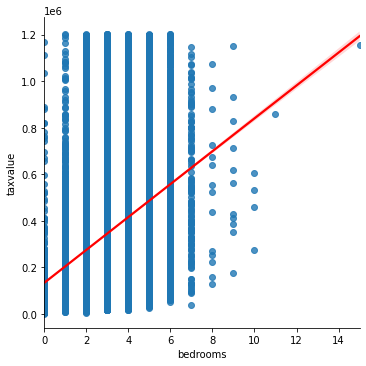

BATHROOMS and taxvalue


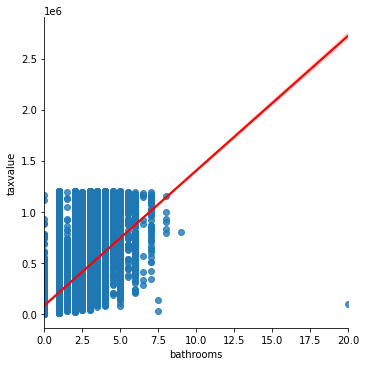

AREA and taxvalue


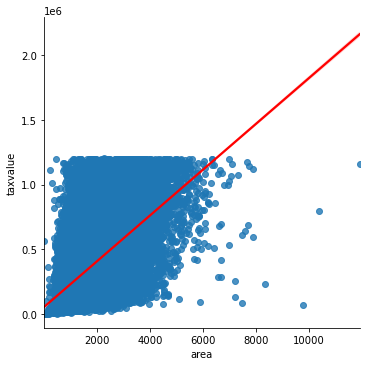

TAXVALUE and taxvalue


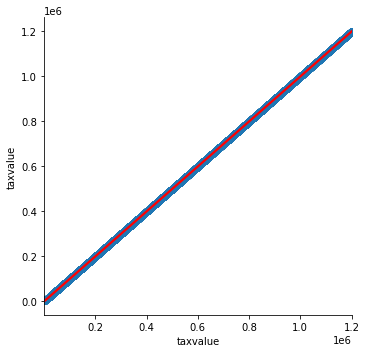

YEARBUILT and taxvalue


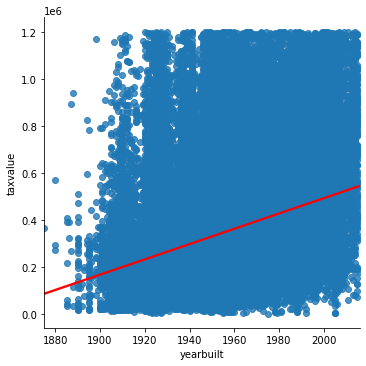

TAXAMOUNT and taxvalue


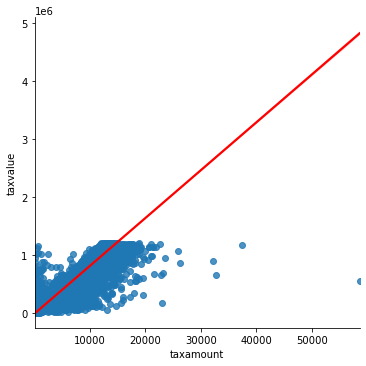

In [7]:
wrg.plot_variable_target_pairs(train_zillow, "taxvalue")

bedrooms
bathrooms
area
taxvalue
yearbuilt
taxamount
county
Orange
Ventura


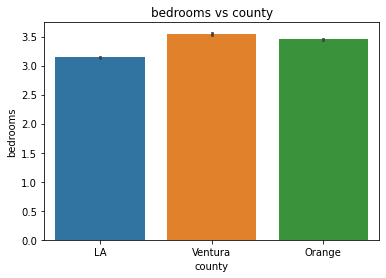

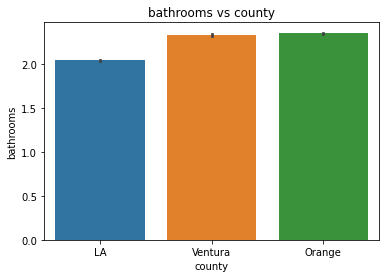

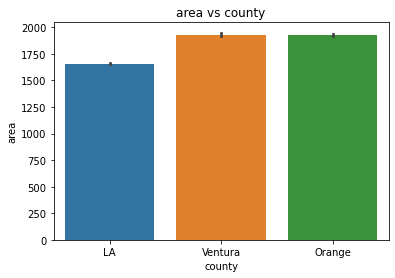

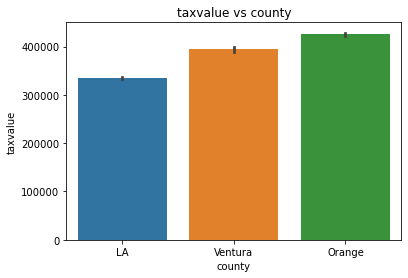

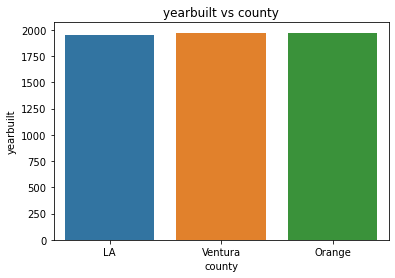

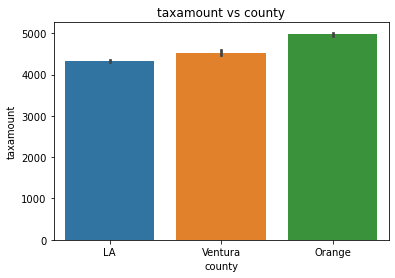

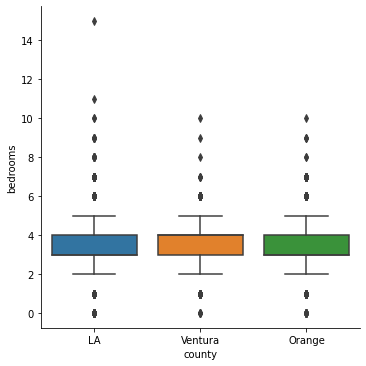

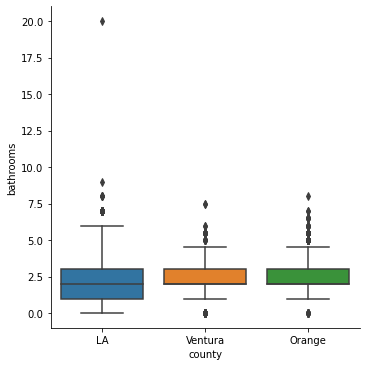

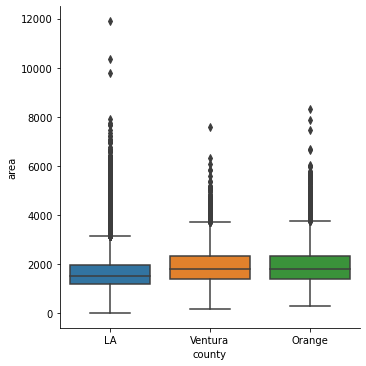

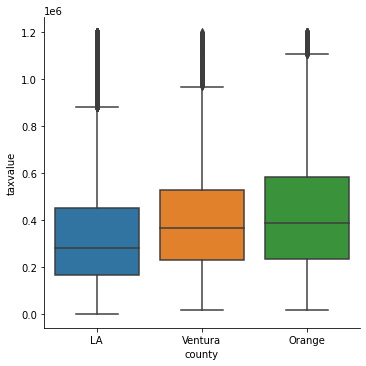

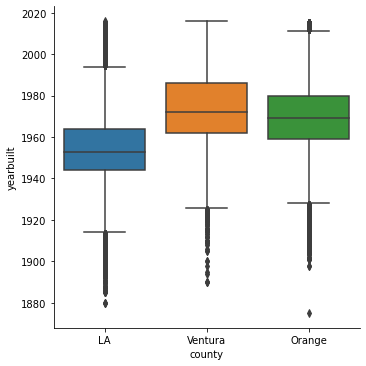

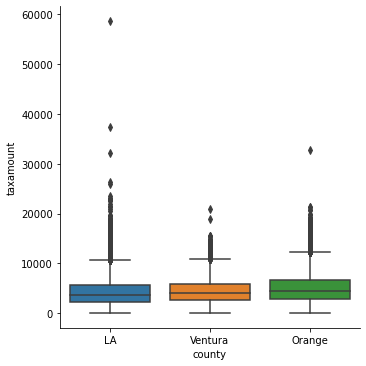

In [8]:
wrg.plot_categorical_and_continuous(train_zillow, "county")

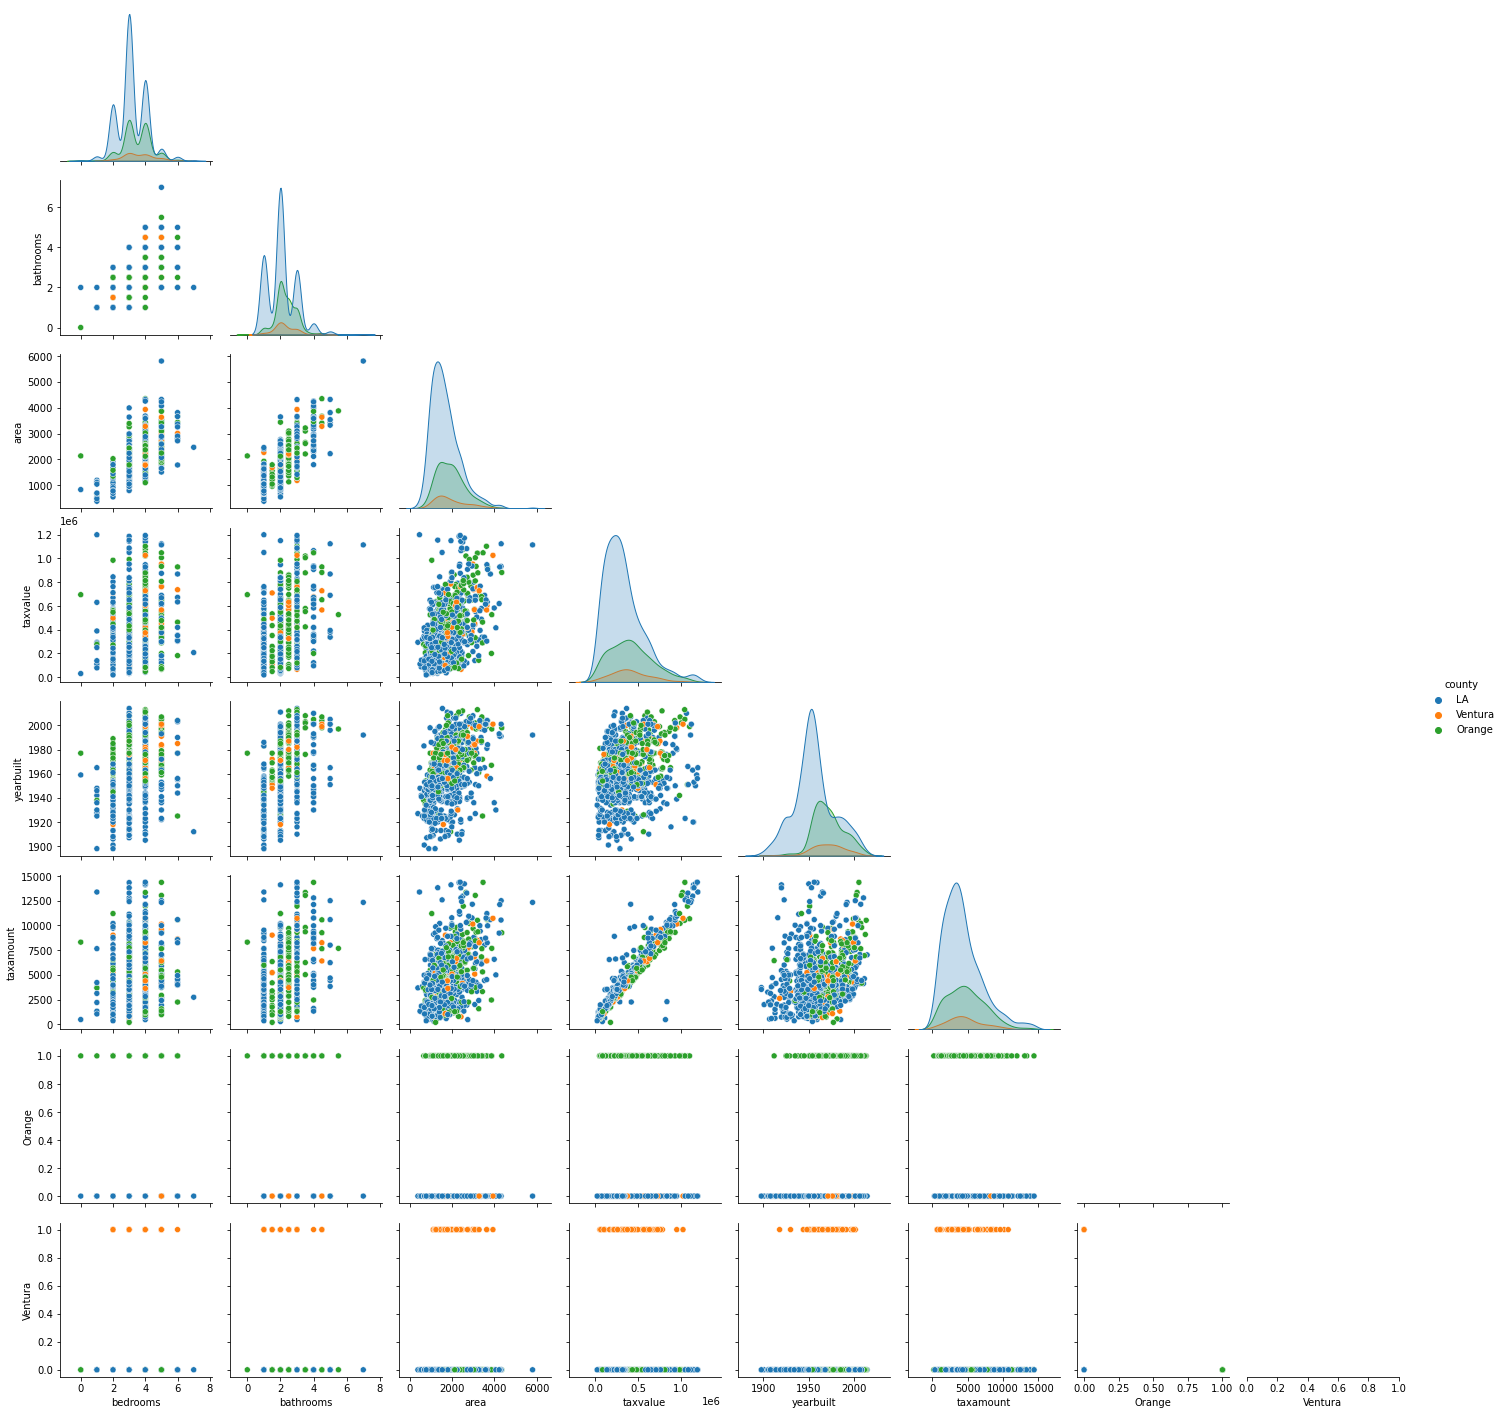

In [ ]:
wrg.pairplot_everything(train_zillow, "county")